Importing the libraries


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv (r'/content/dataset.csv') 

In [ ]:
df.head()

,Type,Social Media Message
0,1,looting will lead to shooting
1,1,We will together gangrape her
2,1,I will make sure you will be raped and murdere...
3,1,Watch your last breath
4,1,"She is dangerously close to a long, slow painf..."


In [ ]:
df.tail()

,Type,Social Media Message
1069,1,sold down the river
1070,1,slave
1071,1,knaive
1072,0,fallacious
1073,0,curiosity


In [ ]:
df.describe()

,Type
count,1074.000000
mean,0.496276
std,0.500219
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.isnull().sum()

Type                    0
Social Media Message    0
dtype: int64

In [ ]:
df[df['Type']==0].count()

Type                    541
Social Media Message    541
dtype: int64

In [ ]:
df[df['Type']>0].count()

Type                    533
Social Media Message    533
dtype: int64

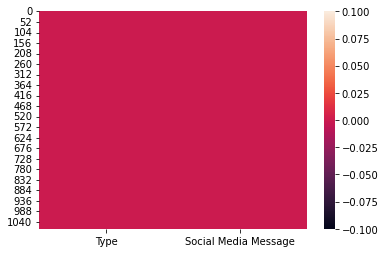

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
good_words=df[df['Type']==0]
bad_words=df[df['Type']==1]

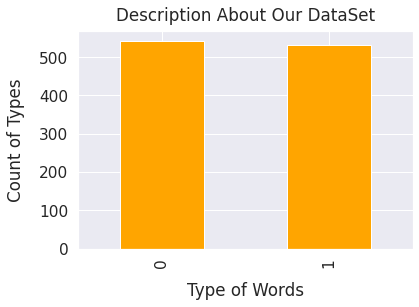

In [ ]:
sns.set(font_scale=1.4)
df['Type'].value_counts().plot(kind='bar',color='orange')
plt.xlabel("Type of Words", labelpad=14)
plt.ylabel("Count of Types", labelpad=14)
plt.title("Description About Our DataSet", y=1.02);

In [ ]:
from sklearn.model_selection import train_test_split
X = df['Social Media Message']
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.shape


(751,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train_counts =count_vect.fit_transform(X_train)

X_train_counts.shape


(751, 1914)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf =tfidf_transformer.fit_transform(X_train_counts)

X_train_tfidf.shape

(751, 1914)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB


In [ ]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),])
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions = text_clf.predict(X_test)
print(predictions)

[0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0
 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0
 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0
 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1]


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[127  40]
 [ 24 132]]


In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       167
           1       0.77      0.85      0.80       156

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.80       323
weighted avg       0.81      0.80      0.80       323



In [ ]:
print(metrics.accuracy_score(y_test,predictions)*100)

80.18575851393189
